### Capstone Two: Preprocessing and Training Data Development

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from pandas import get_dummies


In [2]:
clean_df = pd.read_csv('Clean_df.csv')

In [3]:
clean_df.head()

,age,age group,eligible,job,salary,marital,education,targeted,default,balance,...,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,5,Y,management,100000,married,tertiary,yes,no,2143,...,unknown,5,may,261,1,-1,0,unknown,0,0
1,44,4,Y,technician,60000,single,secondary,yes,no,29,...,unknown,5,may,151,1,-1,0,unknown,0,0
2,33,3,Y,entrepreneur,120000,married,secondary,yes,no,2,...,unknown,5,may,76,1,-1,0,unknown,0,0
3,47,4,Y,blue-collar,20000,married,unknown,no,no,1506,...,unknown,5,may,92,1,-1,0,unknown,0,0
4,33,3,Y,unknown,0,single,unknown,no,no,1,...,unknown,5,may,198,1,-1,0,unknown,0,0


In [4]:
missing_values = clean_df.isnull().mean()*100
missing_values.sum()

0.0

In [5]:
cont_features = []
cat_features = []

for c in clean_df.columns:
    if clean_df[c].dtype == 'int64':
        cont_features += [c]
    else:
        cat_features += [c]

In [6]:
cat_features

['eligible',
 'job',
 'marital',
 'education',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [7]:
dummies = pd.get_dummies(clean_df[cat_features]) 
dummies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   eligible_N           45211 non-null  uint8
 1   eligible_Y           45211 non-null  uint8
 2   job_admin.           45211 non-null  uint8
 3   job_blue-collar      45211 non-null  uint8
 4   job_entrepreneur     45211 non-null  uint8
 5   job_housemaid        45211 non-null  uint8
 6   job_management       45211 non-null  uint8
 7   job_retired          45211 non-null  uint8
 8   job_self-employed    45211 non-null  uint8
 9   job_services         45211 non-null  uint8
 10  job_student          45211 non-null  uint8
 11  job_technician       45211 non-null  uint8
 12  job_unemployed       45211 non-null  uint8
 13  job_unknown          45211 non-null  uint8
 14  marital_divorced     45211 non-null  uint8
 15  marital_married      45211 non-null  uint8
 16  marital_single       4

In [8]:
df_Dummies = clean_df.drop(columns=cat_features) 
df_Dummies = df_Dummies.join(dummies) 
df_Dummies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 59 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   age group            45211 non-null  int64
 2   salary               45211 non-null  int64
 3   balance              45211 non-null  int64
 4   day                  45211 non-null  int64
 5   duration             45211 non-null  int64
 6   campaign             45211 non-null  int64
 7   pdays                45211 non-null  int64
 8   previous             45211 non-null  int64
 9   y                    45211 non-null  int64
 10  response             45211 non-null  int64
 11  eligible_N           45211 non-null  uint8
 12  eligible_Y           45211 non-null  uint8
 13  job_admin.           45211 non-null  uint8
 14  job_blue-collar      45211 non-null  uint8
 15  job_entrepreneur     45211 non-null  uint8
 16  job_housemaid        4

In [9]:
k=-1
count = len([i for i in df_Dummies['pdays'] if i == k])
count

36954

Delete pdays as this column has mostly  -1 value.

In [10]:
df_Dummies.drop(columns='pdays', inplace=True)

Also delete 'age group' column as not necessary

In [11]:
df_Dummies.drop(columns='age group', inplace=True)

In [12]:
df_Dummies.describe()

,age,salary,balance,day,duration,campaign,previous,y,response,eligible_N,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,0.580323,0.116985,0.116985,0.040499,...,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.108403,0.040698,0.033421,0.817478
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,2.303441,0.321406,0.321406,0.197129,...,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.310892,0.197592,0.179735,0.386278
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,275.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


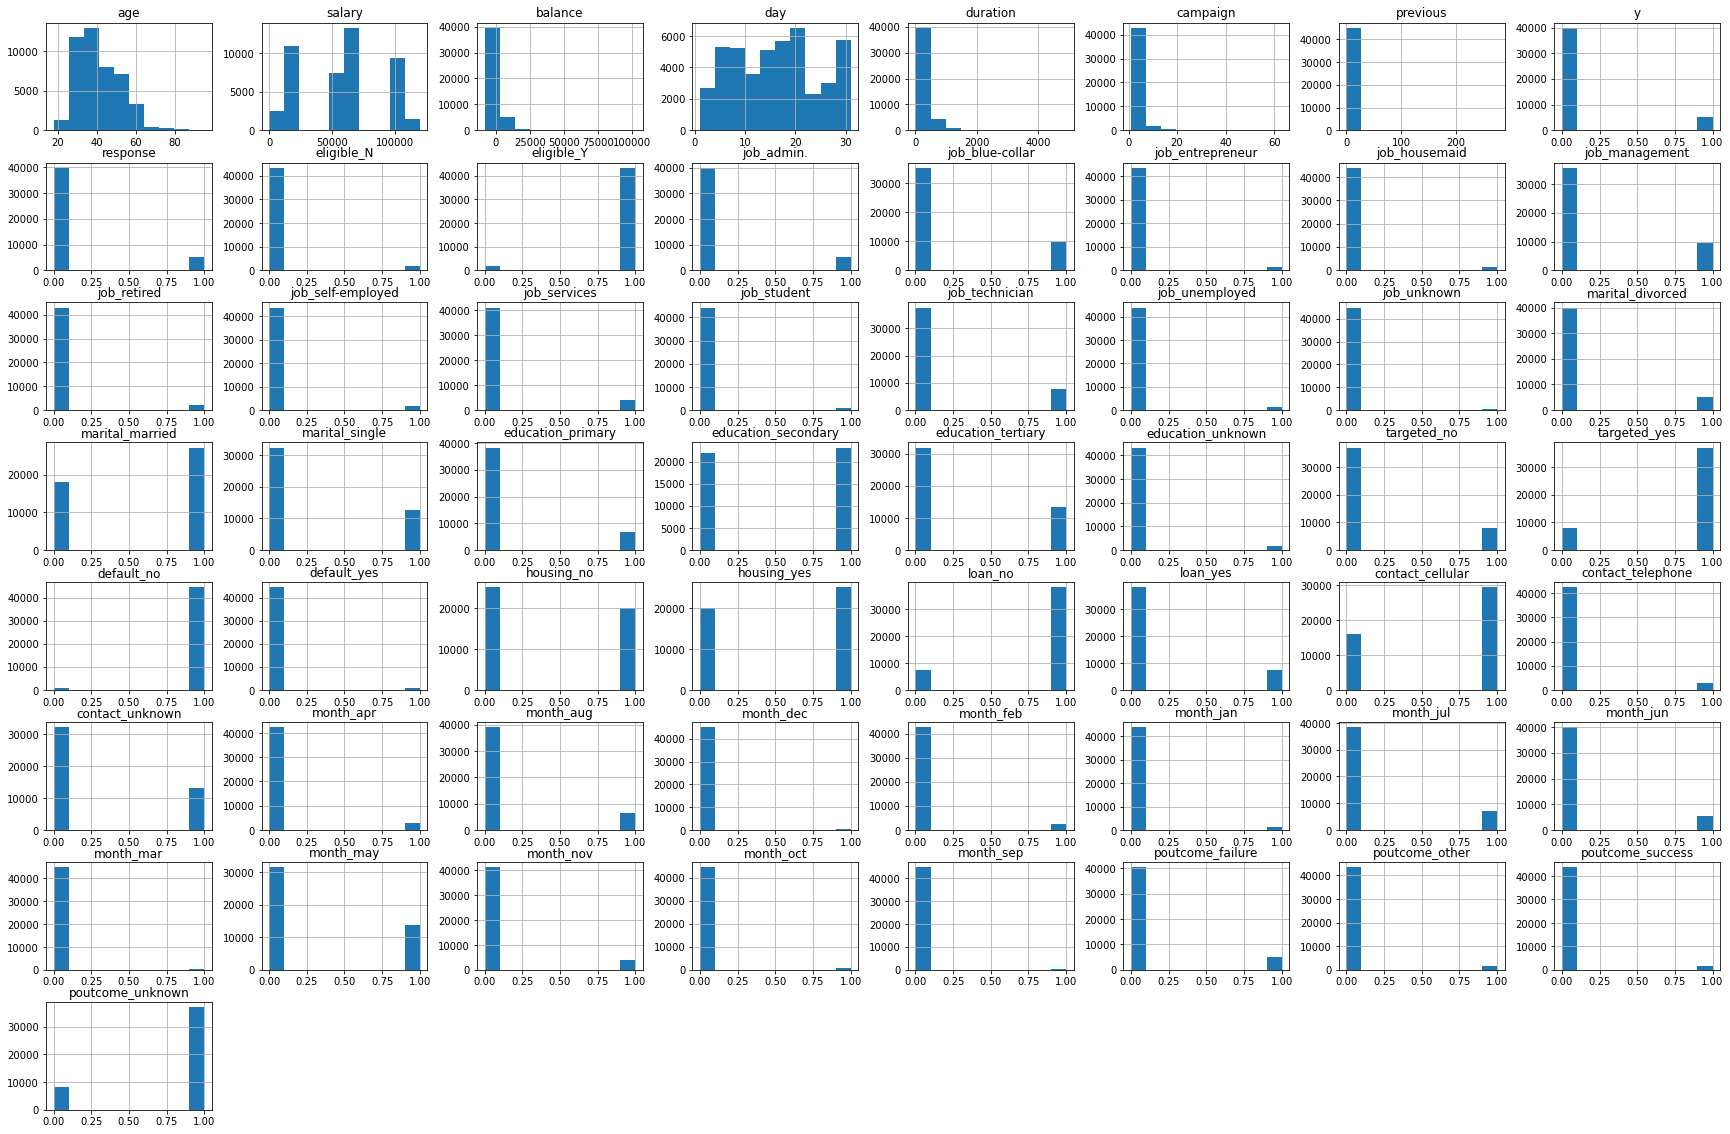

In [13]:
df_Dummies.hist(figsize=(30,20))
plt.show()

Age, Salary and Day are normally distributed.

###### Scale the data

In [15]:
scaler = StandardScaler()

numCols = ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'previous']

df_Dummies[numCols] = scaler.fit_transform(df_Dummies[numCols])

df_Dummies.describe()

,age,salary,balance,day,duration,campaign,previous,y,response,eligible_N,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,5.222844e-16,2.834906e-14,3.070663e-15,-9.219436e-15,5.560938e-17,1.254699e-14,1.355210e-13,0.116985,0.116985,0.040499,...,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.108403,0.040698,0.033421,0.817478
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,0.321406,0.321406,0.197129,...,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.310892,0.197592,0.179735,0.386278
min,-2.159994e+00,-1.776703e+00,-3.081149e+00,-1.779108e+00,-1.002478e+00,-5.693506e-01,-2.519404e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.473845e-01,-1.153366e+00,-4.237719e-01,-9.380027e-01,-6.025167e-01,-5.693506e-01,-2.519404e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-1.823406e-01,9.330824e-02,-3.002800e-01,2.326031e-02,-3.035165e-01,-2.465603e-01,-2.519404e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.652252e-01,4.049768e-01,2.158743e-02,6.240497e-01,2.362370e-01,7.622994e-02,-2.519404e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.091402e+00,1.963320e+00,3.309478e+01,1.825628e+00,1.809470e+01,1.944365e+01,1.191360e+02,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###### Check correlation of target and other features

In [16]:
df_Dummies.corr()[['y']].sort_values(by='y', ascending=False).T

,y,response,duration,poutcome_success,eligible_N,housing_no,contact_cellular,month_mar,month_oct,month_sep,...,marital_married,loan_yes,targeted_yes,job_blue-collar,campaign,month_may,housing_yes,eligible_Y,contact_unknown,poutcome_unknown
y,1.0,1.0,0.394521,0.306788,0.140971,0.139173,0.135873,0.129456,0.128531,0.123185,...,-0.06026,-0.068185,-0.069039,-0.072083,-0.073172,-0.1025,-0.139173,-0.140971,-0.150935,-0.167051


In [17]:
dfTrain, dfTest = train_test_split(df_Dummies, test_size=0.2, random_state=20)
